In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## Sentiment Analysis on Winograd Document.
In this notebook, we will do simple sentiment analysis on the Winograd document. We will be using the RNN model that was trained using Stanford University's Sentiment140 dataset and using Word2Vec embedding.

### Data loading and Preprocessing

In [2]:
import pandas as pd

data = pd.read_csv('/content/gdrive/My Drive/SentimentAnalysis/rnn/data/20000HSA-test.csv')

data['CleanText'] = data['CleanText'].astype(str)    # Convert datatype to integer
data.head(20)

,CleanText,Sentiment
0,many in israel view iran s nuclear ambitions a...,0
1,how can your app show arriving aircraft is ear...,0
2,got highly bored today scanning pages for dadd...,0
3,a friend is having flight cancelled flightlati...,0
4,i guess that is a no then,0
5,goodby silverstein agency new site great,1
6,the former american diplomat who is an expert ...,0
7,morton abramowitz a former assistant secretary...,0
8,the times reported that u s intelligence and t...,0
9,flight iad sat we are on the outdoor track for...,0


### Load RNN Model & Tokanizer

In [3]:
import pickle
from keras.models import load_model
from sklearn.metrics import accuracy_score
from keras.preprocessing.sequence import pad_sequences
import re
from nltk.tokenize import word_tokenize

with open('/content/gdrive/My Drive/SentimentAnalysis/rnn/tokenizers/tokenizer-rnn-cnn-w2v-feb-6.pickle', 'rb') as handle:
  tokenizer = pickle.load(handle)
# load rnn model
rnn_model = load_model('/content/gdrive/My Drive/SentimentAnalysis/rnn/models/rnn-cnn-w2v-model-feb-6-04-0.9362.hdf5')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [4]:
test_sequences = tokenizer.texts_to_sequences(data.CleanText)
padded_test_sequences = pad_sequences(test_sequences, maxlen=35)
y_pred = rnn_model.predict(padded_test_sequences, verbose=1, batch_size=2048)
y_pred = pd.DataFrame(y_pred, columns=['Prediction'])
data['Prediction'] = y_pred['Prediction'].map(lambda p: 1 if p >= 0.5 else 0)
data = data.dropna()
data['Prediction'] = data['Prediction'].astype(int)
print(accuracy_score(data['Sentiment'], data['Prediction']*100))

1238/1238 [==============================] - 1s 980us/step
0.6962843295638126


#### Accuracy
We got a **69.63%** accuracy which improved from around 62% accuracy from last time!

## Analysis
### WordCloud

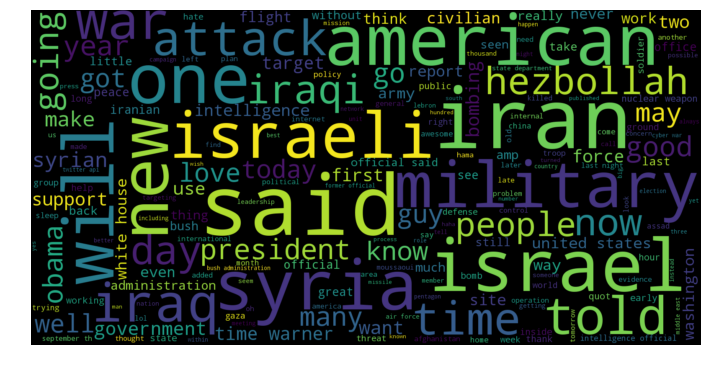

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all the tweets in a single text
wordcloud_texts = ' '.join(data['CleanText'].tolist()).lower()

wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(wordcloud_texts)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Piechart

In [0]:
def plot_pie_chart(positive_count, negative_count, title):
  # Data to plot
  labels = 'Positive', 'Negative'
  sizes = [positive_count, negative_count]
  colors = ['yellowgreen', 'lightcoral']
  explode = (0.1, 0)  # explode 1st slice

  # Plot
  plt.pie(sizes, explode=explode, labels=labels, colors=colors,
          autopct='%1.1f%%', shadow=True, startangle=140)
  plt.title(title)
  plt.axis('equal')
  plt.rcParams["figure.figsize"] = (10, 6)
  plt.show()

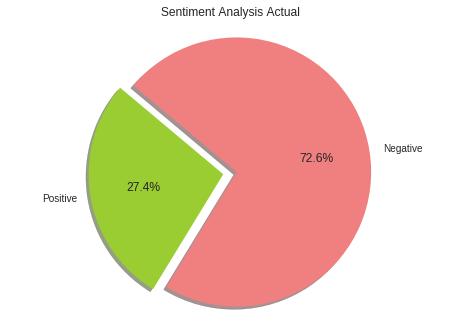

In [7]:
plot_pie_chart(data['Sentiment'].value_counts()[1], data['Sentiment'].value_counts()[0], 
               'Sentiment Analysis Actual')

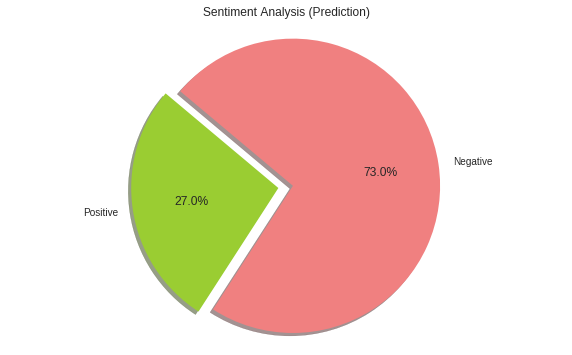

In [8]:
plot_pie_chart(data['Prediction'].value_counts()[1], data['Prediction'].value_counts()[0],
              'Sentiment Analysis (Prediction)')

In [9]:
data

,CleanText,Sentiment,Prediction
0,many in israel view iran s nuclear ambitions a...,0,0
1,how can your app show arriving aircraft is ear...,0,0
2,got highly bored today scanning pages for dadd...,0,1
3,a friend is having flight cancelled flightlati...,0,0
4,i guess that is a no then,0,0
5,goodby silverstein agency new site great,1,1
6,the former american diplomat who is an expert ...,0,0
7,morton abramowitz a former assistant secretary...,0,0
8,the times reported that u s intelligence and t...,0,0
9,flight iad sat we are on the outdoor track for...,0,0


In [0]:
data['Sentiment'].value_counts()[0]

19